In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"E:\Desktop\QAMP results\Kurian's code\Dd_Batch_GHZ_Echo_Est_Final_Sparsity_Heuristic.csv")
data

,Unnamed: 0,num_qubits,qubit,sparsity_by_layer,sparsity_by_time,mean_dt,sd_dt,Circuit_Density,Max_Decoherence,Exp_Value_dd_xpxm,Exp_Value_dd_xx,Exp_Value_no_dd,Abs_Error_dd_xpxm,Abs_Error_dd_xx,Abs_Error_no_dd,Improvement_dd_xpxm,Improvement_dd_xx
0,0,7,123,0.697674,0.679012,220.00,0.00,0.285714,0.004619,-0.627116,-0.622884,-0.656738,0.372884,0.377116,0.343262,-0.029622,-0.033854
1,1,7,124,0.813953,0.839506,272.00,0.00,0.285714,0.004619,-0.627116,-0.622884,-0.656738,0.372884,0.377116,0.343262,-0.029622,-0.033854
2,2,7,136,0.697674,0.679012,73.33,66.98,0.285714,0.004619,-0.627116,-0.622884,-0.656738,0.372884,0.377116,0.343262,-0.029622,-0.033854
3,3,7,140,0.744186,0.802469,130.00,15.00,0.285714,0.004619,-0.627116,-0.622884,-0.656738,0.372884,0.377116,0.343262,-0.029622,-0.033854
4,4,7,141,0.697674,0.679012,73.33,44.46,0.285714,0.004619,-0.627116,-0.622884,-0.656738,0.372884,0.377116,0.343262,-0.029622,-0.033854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,670,55,136,0.960725,0.963121,905.33,535.01,0.039008,0.315310,-0.011230,-0.006185,0.006185,0.988770,0.993815,1.006185,0.017415,0.012370
671,671,55,140,0.966767,0.977305,1378.00,159.00,0.039008,0.315310,-0.011230,-0.006185,0.006185,0.988770,0.993815,1.006185,0.017415,0.012370
672,672,55,141,0.960725,0.963121,905.33,644.40,0.039008,0.315310,-0.011230,-0.006185,0.006185,0.988770,0.993815,1.006185,0.017415,0.012370
673,673,55,142,0.960725,0.963121,905.33,607.89,0.039008,0.315310,-0.011230,-0.006185,0.006185,0.988770,0.993815,1.006185,0.017415,0.012370


In [21]:
circuit_df = (
    data.groupby("num_qubits")
    .agg(
        # ---- Sparsity (circuit-level from per-qubit) ----
        sparsity_layer_mean=("sparsity_by_layer", "mean"),
        sparsity_layer_max=("sparsity_by_layer", "max"),
        sparsity_time_mean=("sparsity_by_time", "mean"),
        sparsity_time_max=("sparsity_by_time", "max"),
        mean_dt_mean=("mean_dt", "mean"),
        mean_dt_max=("mean_dt", "max"),
        sd_dt_mean=("sd_dt", "mean"),
        sd_dt_max=("sd_dt", "max"),

        # ---- Circuit-level constants ----
        Circuit_Density=("Circuit_Density", "first"),
        Max_Decoherence=("Max_Decoherence", "first"),

        # ---- Expectation values ----
        Exp_Value_no_dd=("Exp_Value_no_dd", "first"),
        Exp_Value_dd_xx=("Exp_Value_dd_xx", "first"),
        Exp_Value_dd_xpxm=("Exp_Value_dd_xpxm", "first"),

        # ---- Errors ----
        Abs_Error_no_dd=("Abs_Error_no_dd", "first"),
        Abs_Error_dd_xx=("Abs_Error_dd_xx", "first"),
        Abs_Error_dd_xpxm=("Abs_Error_dd_xpxm", "first"),

        # ---- Improvements ----
        Improvement_dd_xx=("Improvement_dd_xx", "first"),
        Improvement_dd_xpxm=("Improvement_dd_xpxm", "first"),
    )
    .reset_index()
)

circuit_df


,num_qubits,sparsity_layer_mean,sparsity_layer_max,sparsity_time_mean,sparsity_time_max,mean_dt_mean,mean_dt_max,sd_dt_mean,sd_dt_max,Circuit_Density,Max_Decoherence,Exp_Value_no_dd,Exp_Value_dd_xx,Exp_Value_dd_xpxm,Abs_Error_no_dd,Abs_Error_dd_xx,Abs_Error_dd_xpxm,Improvement_dd_xx,Improvement_dd_xpxm
0,7,0.720930,0.813953,0.719577,0.839506,130.760000,272.0,23.841429,66.98,0.285714,0.004619,-0.656738,-0.622884,-0.627116,0.343262,0.377116,0.372884,-0.033854,-0.029622
1,8,0.752551,0.836735,0.753989,0.861702,150.668750,324.0,32.745000,91.49,0.252604,0.027991,0.575358,0.600423,0.603190,0.424642,0.399577,0.396810,0.025065,0.027832
2,10,0.798361,0.868852,0.802500,0.891667,188.931000,428.0,50.903000,140.50,0.205000,0.027991,0.446940,0.534342,0.543783,0.553060,0.465658,0.456217,0.087402,0.096842
3,11,0.815468,0.880597,0.820232,0.902256,207.578182,480.0,60.536364,165.01,0.187328,0.028355,-0.314290,-0.369303,-0.361165,0.685710,0.630697,0.638835,0.055013,0.046875
4,13,0.842259,0.898734,0.847605,0.918239,244.253846,584.0,79.948462,214.03,0.159763,0.098807,-0.348958,-0.436198,-0.428060,0.651042,0.563802,0.571940,0.087240,0.079102
5,16,0.870490,0.917526,0.875947,0.934343,298.330625,740.0,109.860625,287.57,0.130859,0.107095,0.051270,0.309408,0.309570,0.948730,0.690592,0.690430,0.258138,0.258301
6,19,0.890160,0.930435,0.895403,0.945148,351.751579,896.0,140.229474,361.10,0.110803,0.096633,0.049967,-0.205892,-0.195638,1.049967,0.794108,0.804362,0.255859,0.245605
7,22,0.904648,0.939850,0.909585,0.952899,404.785000,1052.0,170.872273,434.64,0.096074,0.123442,-0.060059,0.093587,0.098145,1.060059,0.906413,0.901855,0.153646,0.158203
8,25,0.915762,0.947020,0.920381,0.958730,457.570400,1208.0,201.690400,508.18,0.084800,0.147404,0.042806,-0.062988,-0.078613,1.042806,0.937012,0.921387,0.105794,0.121419
9,28,0.924556,0.952663,0.928874,0.963277,510.187500,1364.0,232.626786,581.72,0.075893,0.134663,-0.007324,0.049642,0.059733,1.007324,0.950358,0.940267,0.056966,0.067057


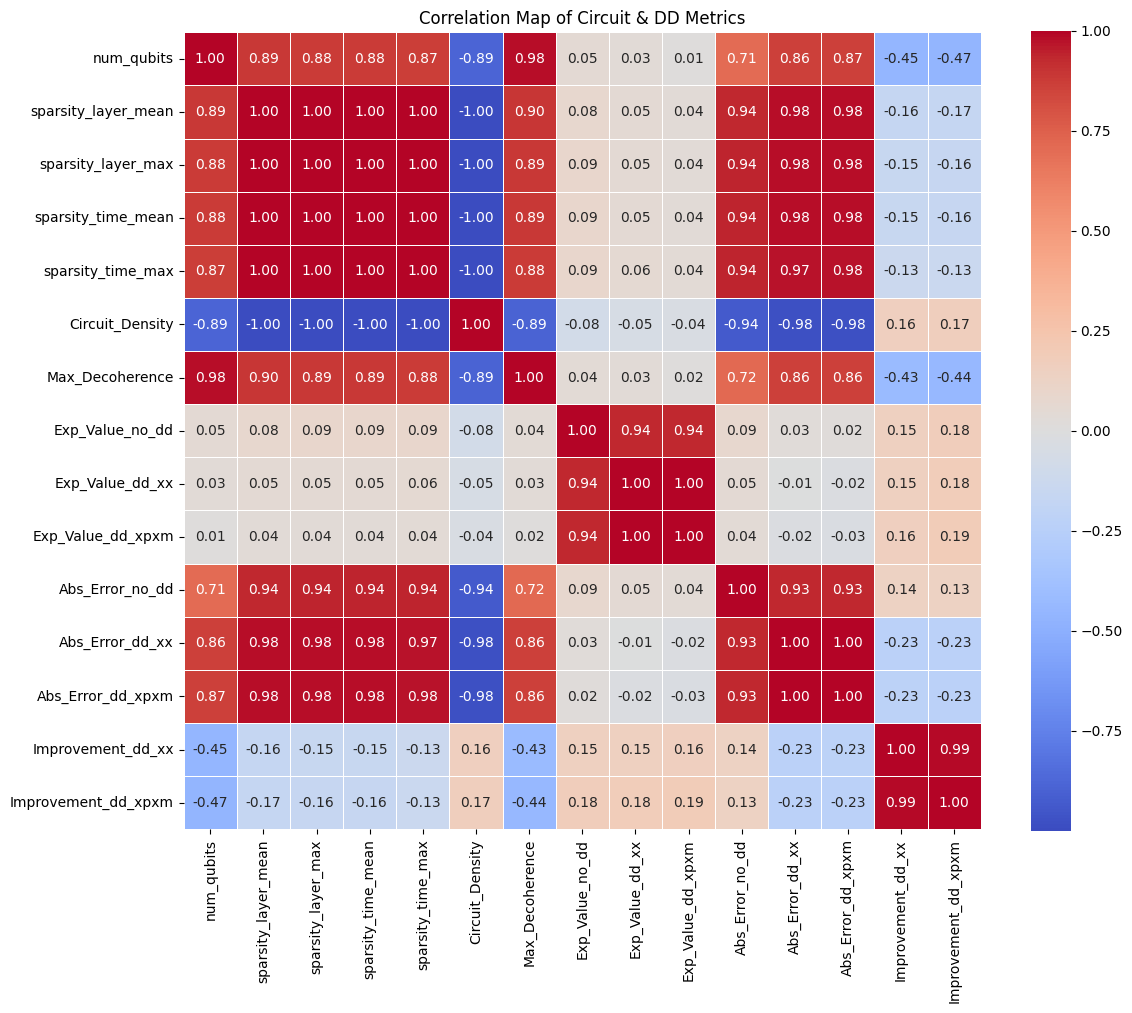

In [5]:
# Compute correlation matrix
corr = circuit_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5
)

plt.title("Correlation Map of Circuit & DD Metrics")
plt.tight_layout()
plt.show()

In [6]:
x_params = [
    "sparsity_layer_mean",
    "sparsity_layer_max",
    "sparsity_time_mean",
    "sparsity_time_max",
    "Circuit_Density",
    "Max_Decoherence"
]

y_params = [
    "Improvement_dd_xpxm",
    "Improvement_dd_xx",
    "Abs_Error_no_dd",
    "Abs_Error_dd_xpxm",
    "Abs_Error_dd_xx"
]

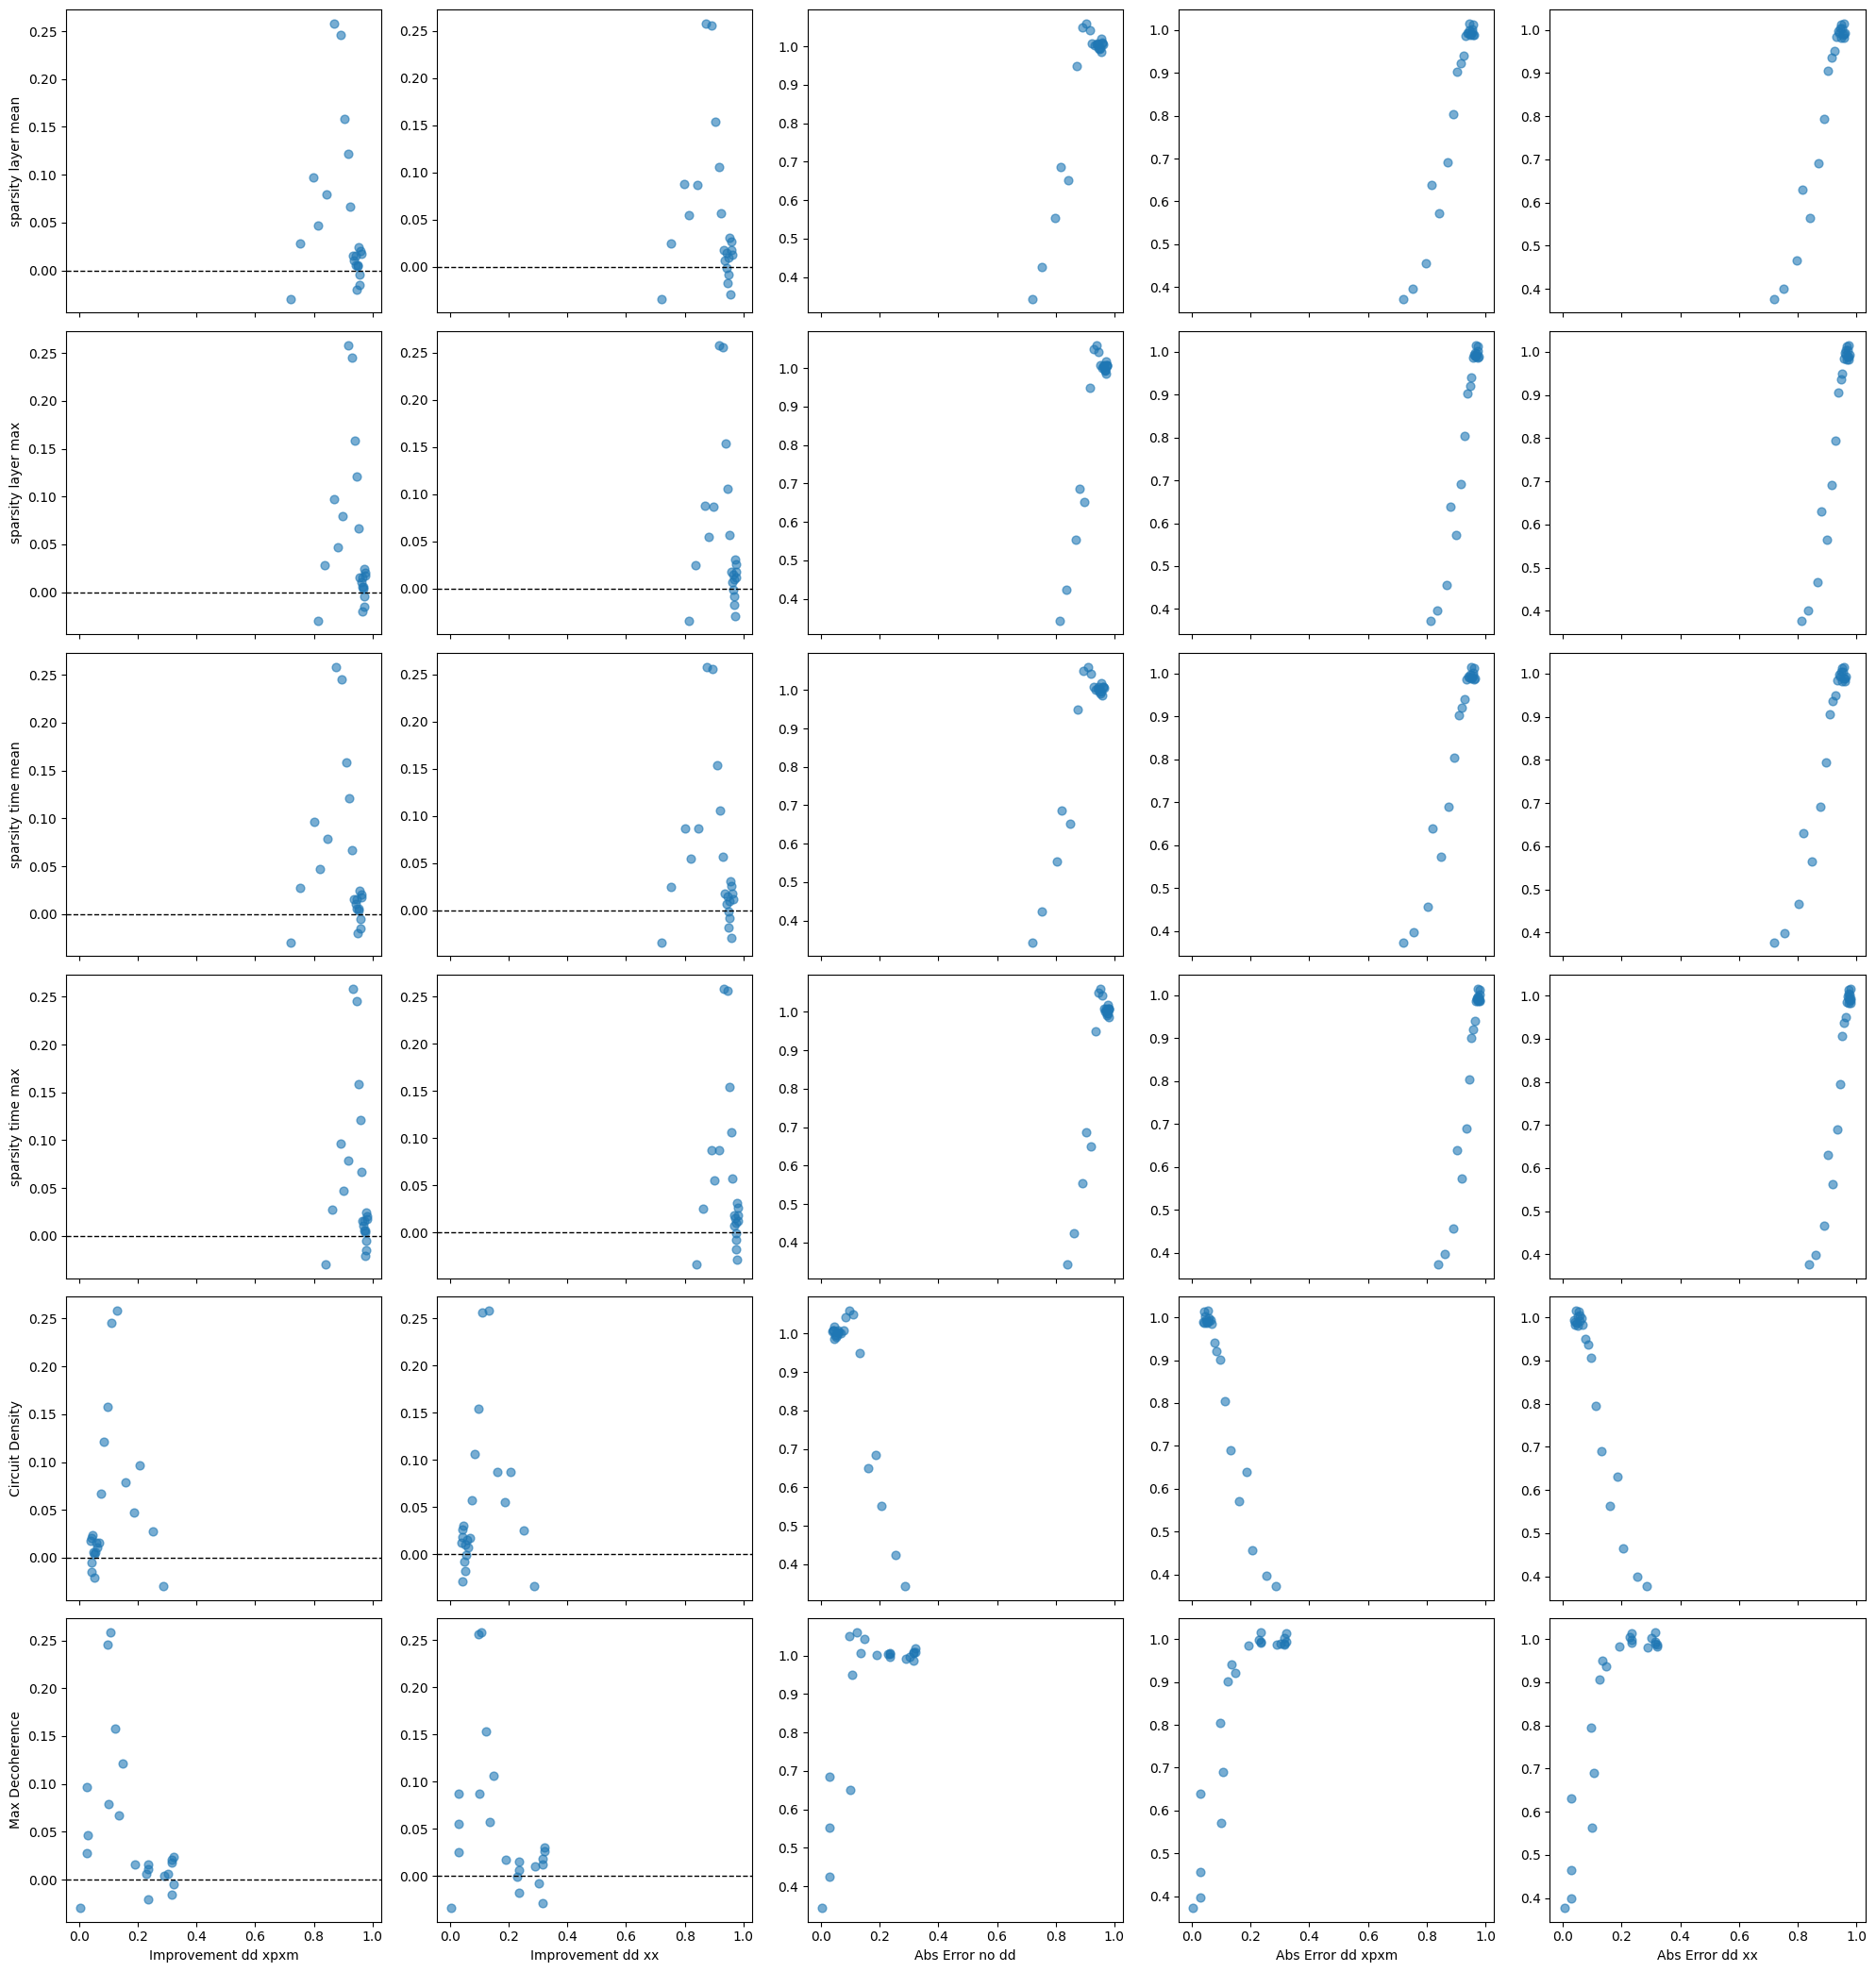

In [8]:
fig, axes = plt.subplots(
    nrows=len(x_params),
    ncols=len(y_params),
    figsize=(4*len(y_params), 3.5*len(x_params)),
    sharex="col"
)

for i, x in enumerate(x_params):
    for j, y in enumerate(y_params):
        ax = axes[i, j]

        ax.scatter(
            circuit_df[x],
            circuit_df[y],
            alpha=0.6,
            s=40
        )

        # Zero reference for improvement
        if "Improvement" in y:
            ax.axhline(0, color="black", linestyle="--", linewidth=1)

        # Axis labels only on edges
        if i == len(x_params) - 1:
            ax.set_xlabel(y.replace("_", " "))
        if j == 0:
            ax.set_ylabel(x.replace("_", " "))


plt.tight_layout()
plt.show()

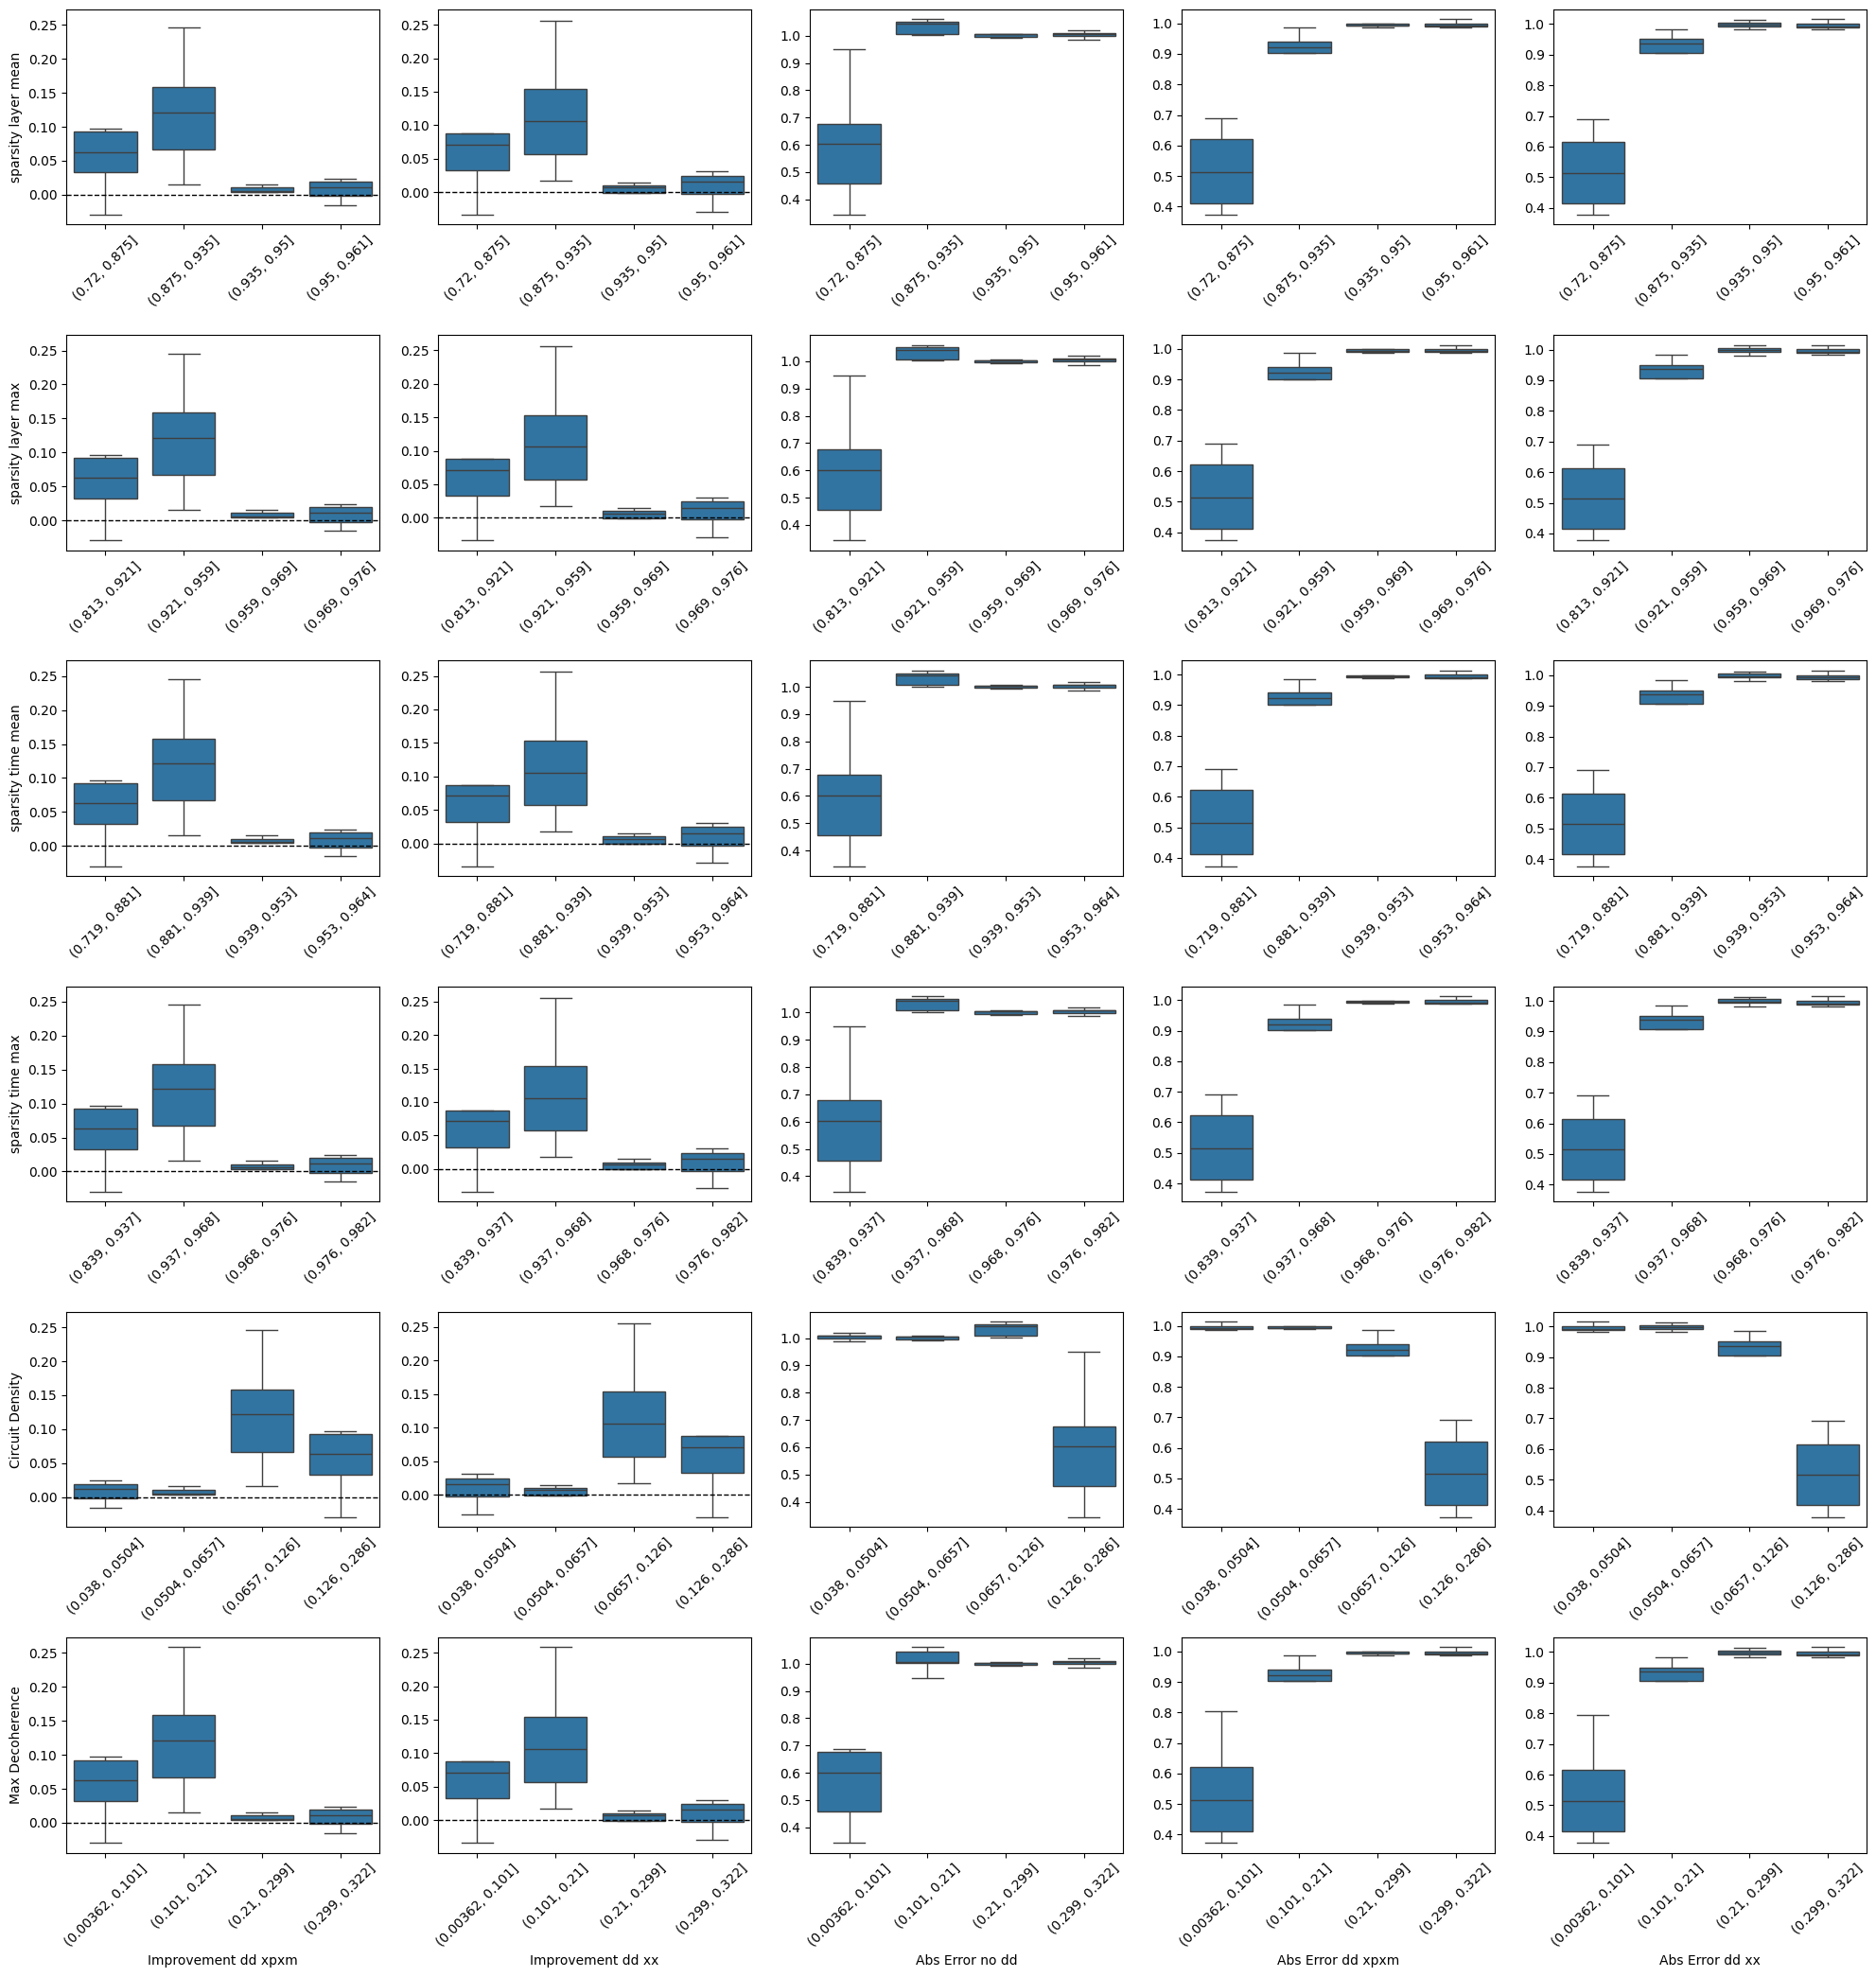

In [9]:
# Number of bins for box plots
n_bins = 4

# -----------------------
# Create binned columns
# -----------------------
df_binned = circuit_df.copy()

for x in x_params:
    df_binned[f"{x}_bin"] = pd.qcut(
        df_binned[x],
        q=n_bins,
        duplicates="drop"
    )

# -----------------------
# Plot grid
# -----------------------
fig, axes = plt.subplots(
    nrows=len(x_params),
    ncols=len(y_params),
    figsize=(4*len(y_params), 3.5*len(x_params)),
    sharey="col"
)

for i, x in enumerate(x_params):
    for j, y in enumerate(y_params):
        ax = axes[i, j]

        sns.boxplot(
            data=df_binned,
            x=f"{x}_bin",
            y=y,
            ax=ax,
            showfliers=False
        )

        # Zero reference for improvement metrics
        if "Improvement" in y:
            ax.axhline(0, color="black", linestyle="--", linewidth=1)

        # Axis labels only on edges
        if i == len(x_params) - 1:
            ax.set_xlabel(y.replace("_", " "))
        else:
            ax.set_xlabel("")

        if j == 0:
            ax.set_ylabel(x.replace("_", " "))
        else:
            ax.set_ylabel("")

        ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

C:\Users\shrey\AppData\Local\Temp\ipykernel_22916\2113633837.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(f"{x}_bin")[y]
C:\Users\shrey\AppData\Local\Temp\ipykernel_22916\2113633837.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(f"{x}_bin")[y]
C:\Users\shrey\AppData\Local\Temp\ipykernel_22916\2113633837.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(f"{x}_bin")[y]
C:\Users\s

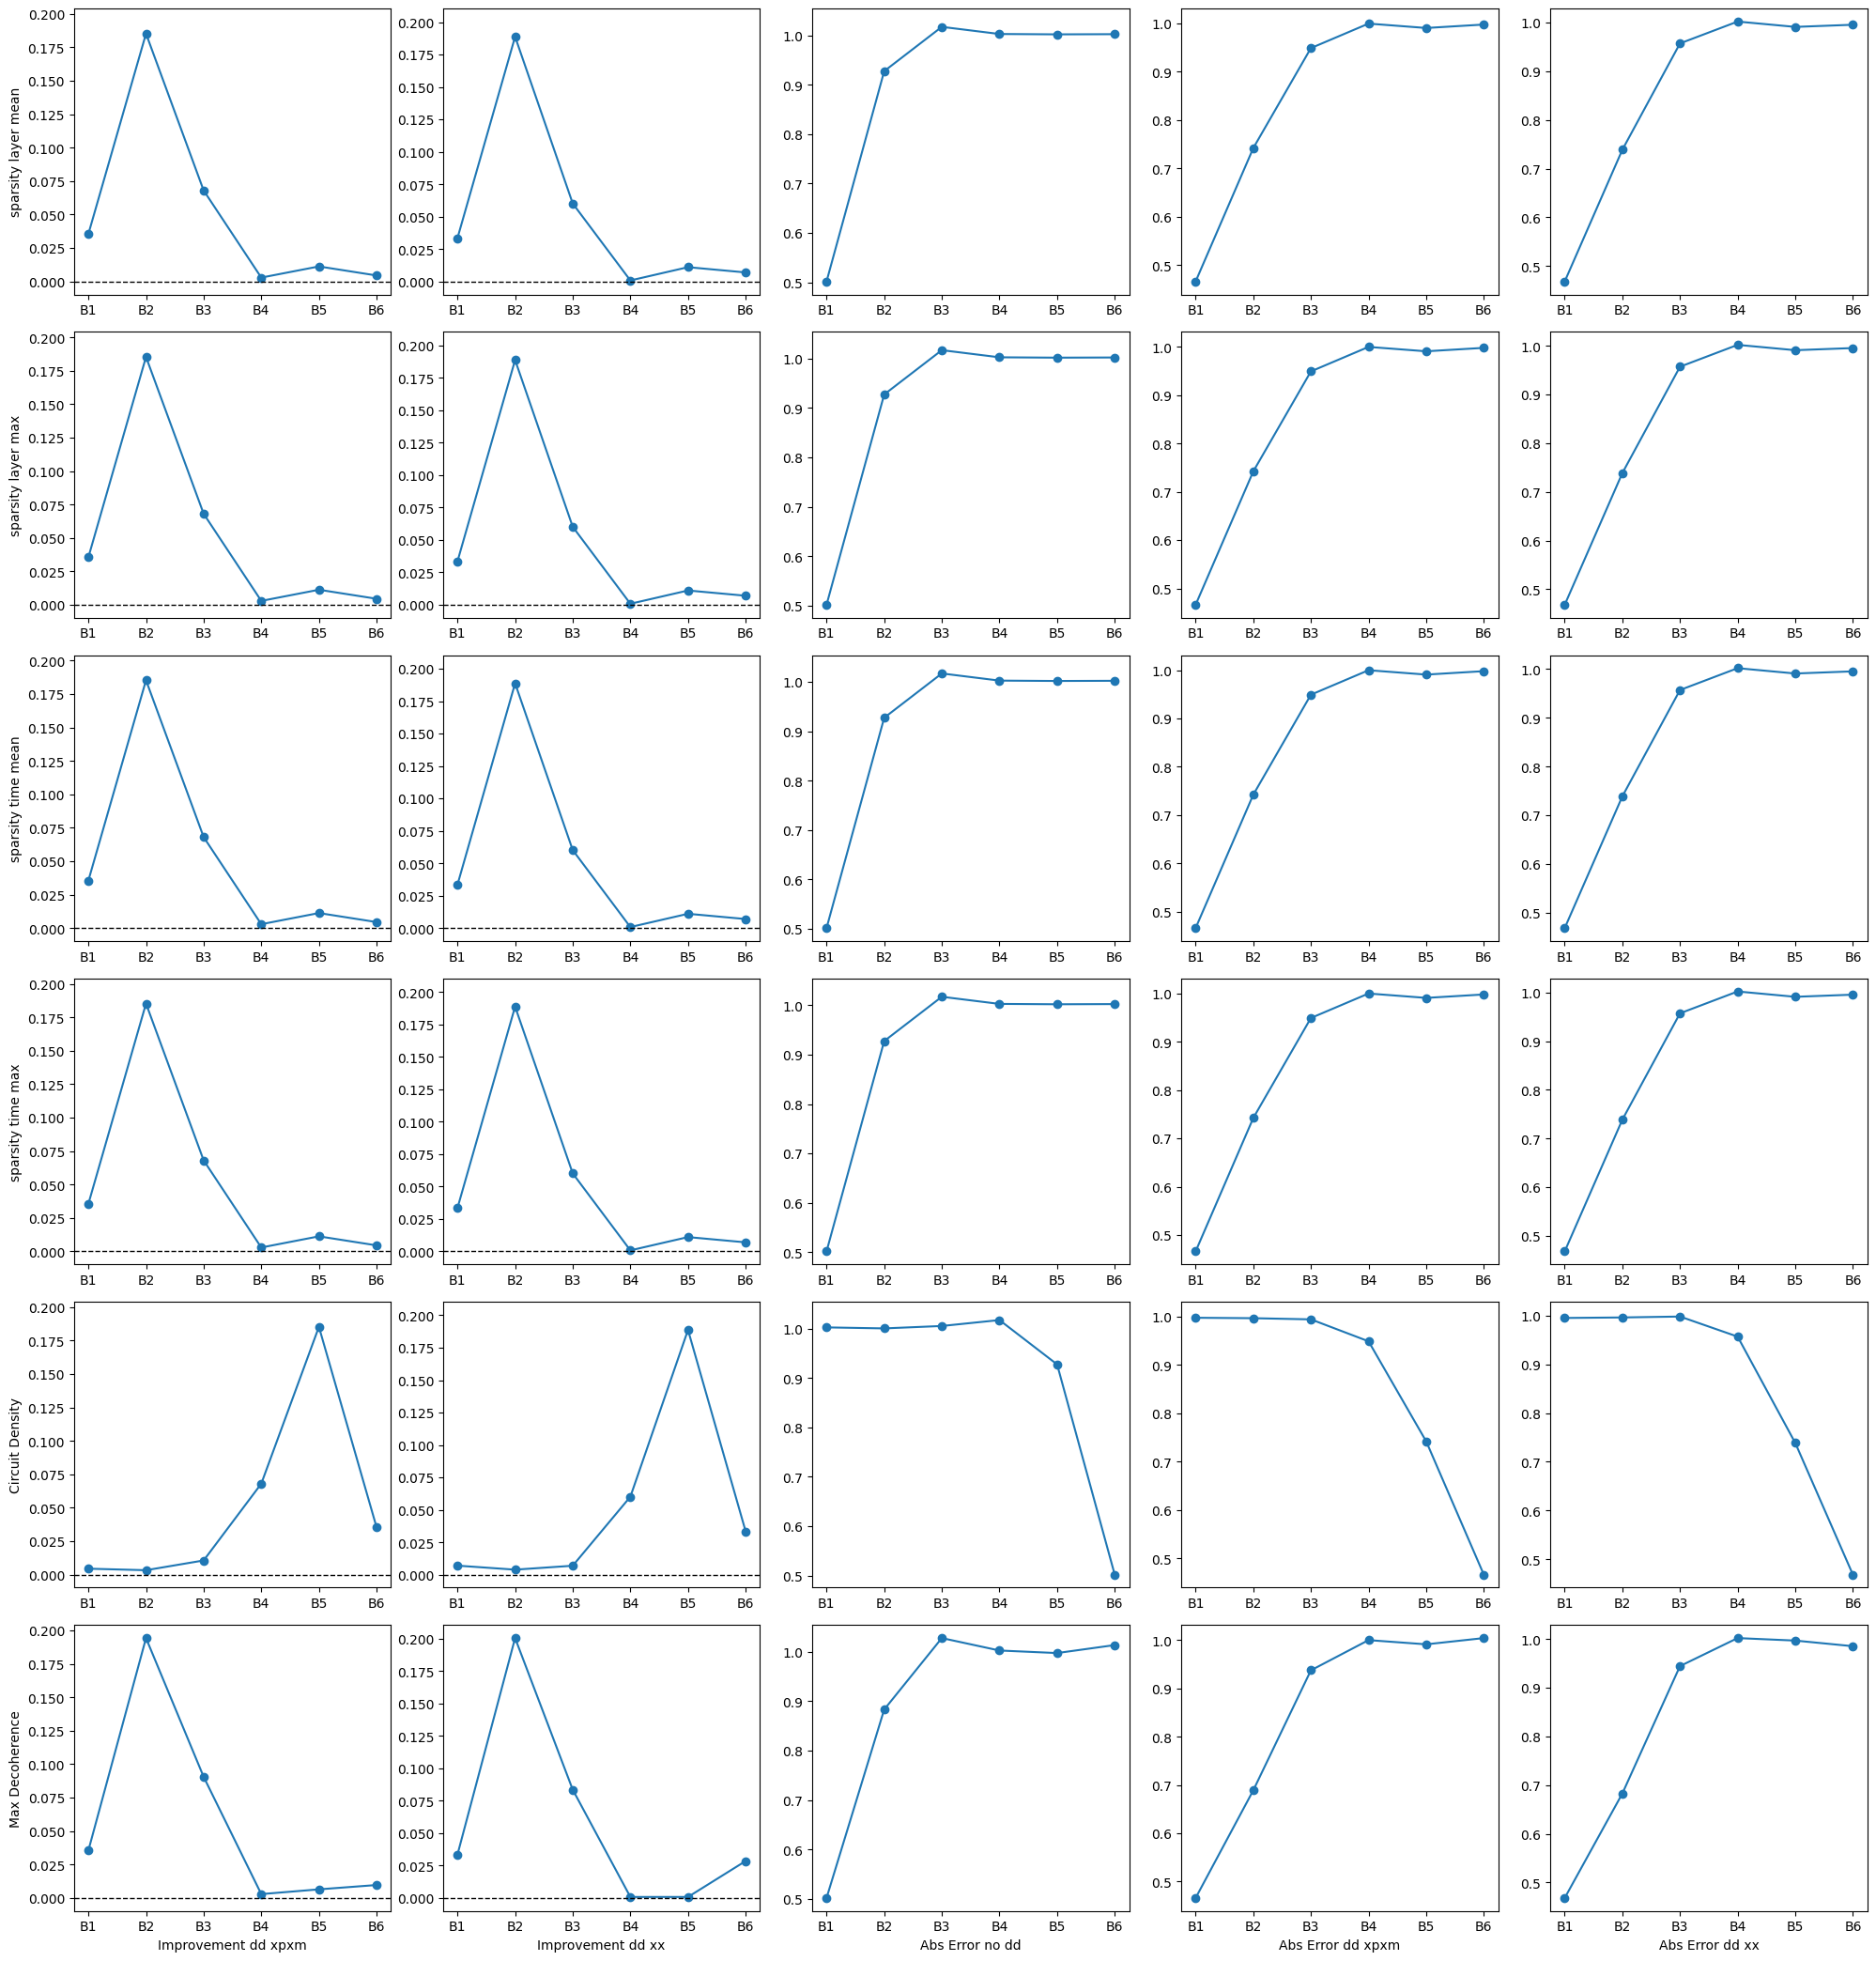

In [10]:
# Number of bins
n_bins = 6

# Copy to avoid modifying original df
df_binned = circuit_df.copy()

# Create bins
for x in x_params:
    df_binned[f"{x}_bin"] = pd.qcut(
        df_binned[x],
        q=n_bins,
        duplicates="drop"
    )

# Plot grid
fig, axes = plt.subplots(
    nrows=len(x_params),
    ncols=len(y_params),
    figsize=(4*len(y_params), 3.5*len(x_params)),
    sharey="col"
)

for i, x in enumerate(x_params):
    for j, y in enumerate(y_params):
        ax = axes[i, j]

        # Compute binned mean
        bin_means = (
            df_binned
            .groupby(f"{x}_bin")[y]
            .mean()
        )

        ax.plot(
            range(len(bin_means)),
            bin_means.values,
            marker="o"
        )

        # Zero reference for improvement metrics
        if "Improvement" in y:
            ax.axhline(0, linestyle="--", color="black", linewidth=1)

        # Labels only on edges
        if i == len(x_params) - 1:
            ax.set_xlabel(y.replace("_", " "))
        else:
            ax.set_xlabel("")

        if j == 0:
            ax.set_ylabel(x.replace("_", " "))
        else:
            ax.set_ylabel("")

        ax.set_xticks(range(len(bin_means)))
        ax.set_xticklabels(
            [f"B{i+1}" for i in range(len(bin_means))],
            rotation=0
        )

plt.tight_layout()
plt.show()

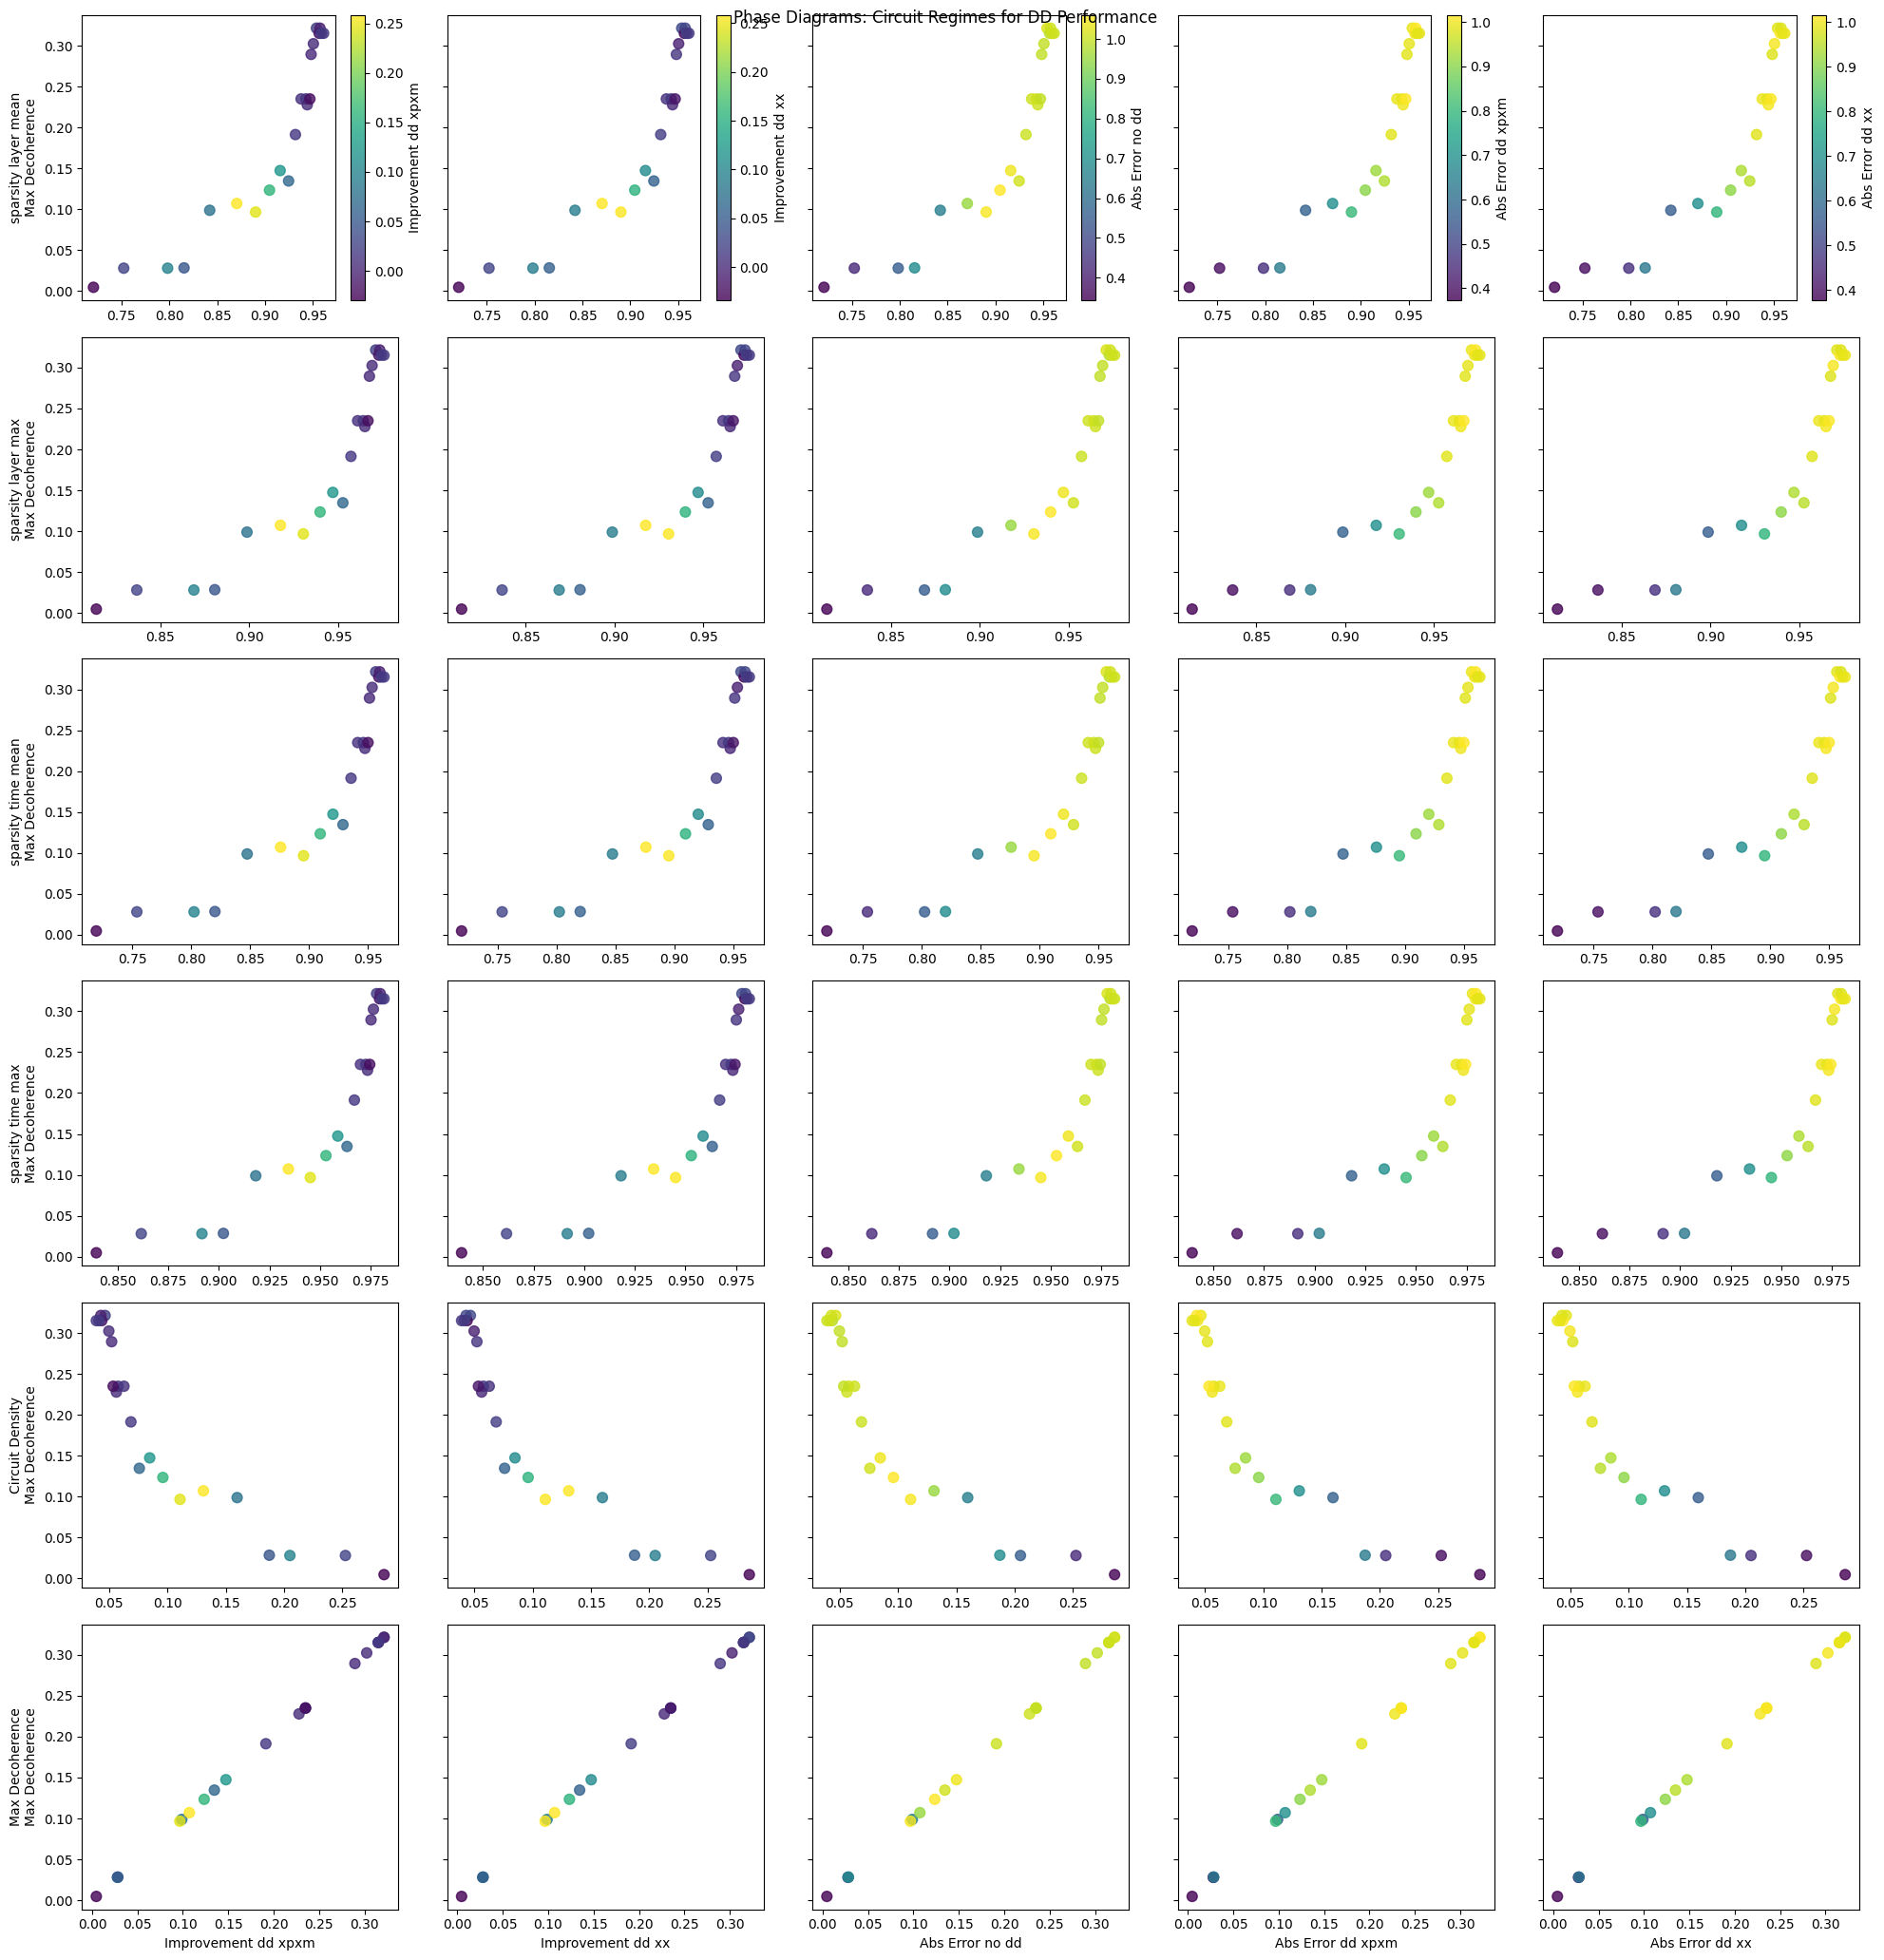

In [11]:
# Choose which performance metrics to visualize as phase color
phase_metrics = [
    "Improvement_dd_xpxm",
    "Improvement_dd_xx",
    "Abs_Error_no_dd",
    "Abs_Error_dd_xpxm",
    "Abs_Error_dd_xx"
]

fig, axes = plt.subplots(
    nrows=len(x_params),
    ncols=len(phase_metrics),
    figsize=(4*len(phase_metrics), 3.5*len(x_params)),
    sharey="row"
)

for i, x in enumerate(x_params):
    for j, z in enumerate(phase_metrics):
        ax = axes[i, j]

        sc = ax.scatter(
            circuit_df[x],
            circuit_df["Max_Decoherence"],
            c=circuit_df[z],
            s=60,
            alpha=0.8
        )

        # Labels only on edges
        if i == len(x_params) - 1:
            ax.set_xlabel(z.replace("_", " "))
        else:
            ax.set_xlabel("")

        if j == 0:
            ax.set_ylabel(f"{x.replace('_',' ')}\nMax Decoherence")
        else:
            ax.set_ylabel("")

        # Colorbar per column
        if i == 0:
            cbar = plt.colorbar(sc, ax=ax)
            cbar.set_label(z.replace("_", " "))

plt.suptitle("Phase Diagrams: Circuit Regimes for DD Performance")

plt.tight_layout()
plt.show()


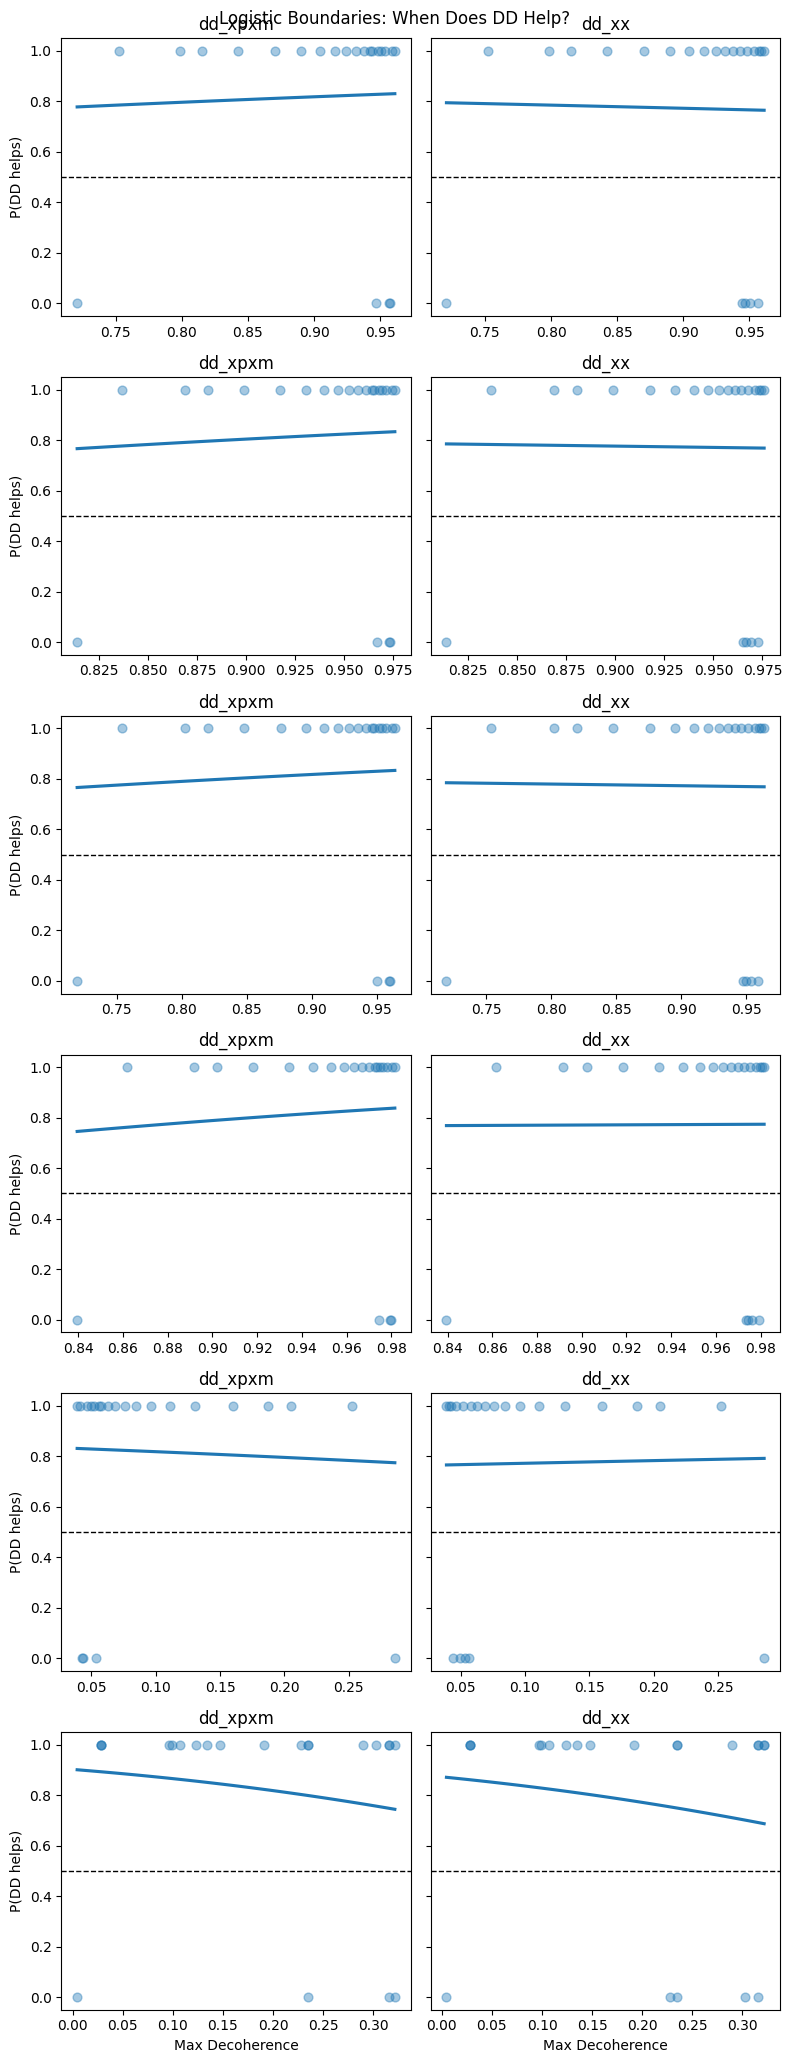

In [12]:
# Binary targets: does DD help?
circuit_df["dd_xpxm_helped"] = (circuit_df["Improvement_dd_xpxm"] > 0).astype(int)
circuit_df["dd_xx_helped"]   = (circuit_df["Improvement_dd_xx"] > 0).astype(int)

help_cols = {
    "dd_xpxm": "dd_xpxm_helped",
    "dd_xx": "dd_xx_helped"
}

fig, axes = plt.subplots(
    nrows=len(x_params),
    ncols=2,
    figsize=(8, 3.5*len(x_params)),
    sharey=True
)

for i, x in enumerate(x_params):
    for j, (dd_label, help_col) in enumerate(help_cols.items()):
        ax = axes[i, j]

        # Sort for smooth curve
        df_sorted = circuit_df.sort_values(x)

        # Scatter (binary outcomes)
        ax.scatter(
            df_sorted[x],
            df_sorted[help_col],
            alpha=0.4,
            s=40
        )

        # Logistic fit
        sns.regplot(
            data=df_sorted,
            x=x,
            y=help_col,
            logistic=True,
            ci=None,
            scatter=False,
            ax=ax
        )

        ax.axhline(0.5, linestyle="--", color="black", linewidth=1)

        # Labels only on edges
        if i == len(x_params) - 1:
            ax.set_xlabel(x.replace("_", " "))
        else:
            ax.set_xlabel("")

        if j == 0:
            ax.set_ylabel("P(DD helps)")
        else:
            ax.set_ylabel("")

        ax.set_title(dd_label)

plt.suptitle(
    "Logistic Boundaries: When Does DD Help?"
)

plt.tight_layout()
plt.show()


In [13]:
from scipy.interpolate import make_interp_spline

In [19]:
def get_smooth_curve(x, y, k=2, n_points=300):
    x = np.asarray(x)
    y = np.asarray(y)

    idx = np.argsort(x)
    x = x[idx]
    y = y[idx]

    x_unique, uniq_idx = np.unique(x, return_index=True)
    y_unique = y[uniq_idx]

    if len(x_unique) < k + 1:
        return x_unique, y_unique

    x_new = np.linspace(x_unique.min(), x_unique.max(), n_points)
    spline = make_interp_spline(x_unique, y_unique, k=k)
    y_new = spline(x_new)

    return x_new, y_new

def plot_param_vs_improvement(ax, x_param, y_param, title):
    # Smooth curve
    df_sorted = circuit_df.sort_values(x_param)
    x_smooth, y_smooth = get_smooth_curve(
        df_sorted[x_param], df_sorted[y_param]
    )
    ax.plot(x_smooth, y_smooth, color="gray", linewidth=2, alpha=0.5, zorder=1)

    # Scatter
    sns.scatterplot(
        data=circuit_df,
        x=x_param,
        y=y_param,
        size="num_qubits",
        sizes=(500, 1000),
        hue="num_qubits",
        palette="viridis",
        legend=False,
        alpha=0.9,
        ax=ax,
        zorder=2,
    )

    # Qubit labels
    for _, row in circuit_df.iterrows():
        ax.text(
            row[x_param],
            row[y_param],
            str(int(row["num_qubits"])),
            ha="center",
            va="center",
            fontsize=10,
            weight="bold",
            color="white" if row["num_qubits"] < circuit_df["num_qubits"].median() else "black",
        )

    ax.axhline(0, color="black", linestyle="--", linewidth=1)
    ax.set_title(title, fontsize=13)
    ax.set_xlabel(x_param)
    ax.set_ylabel("Improvement")
    ax.grid(True, linestyle="--", alpha=0.6)

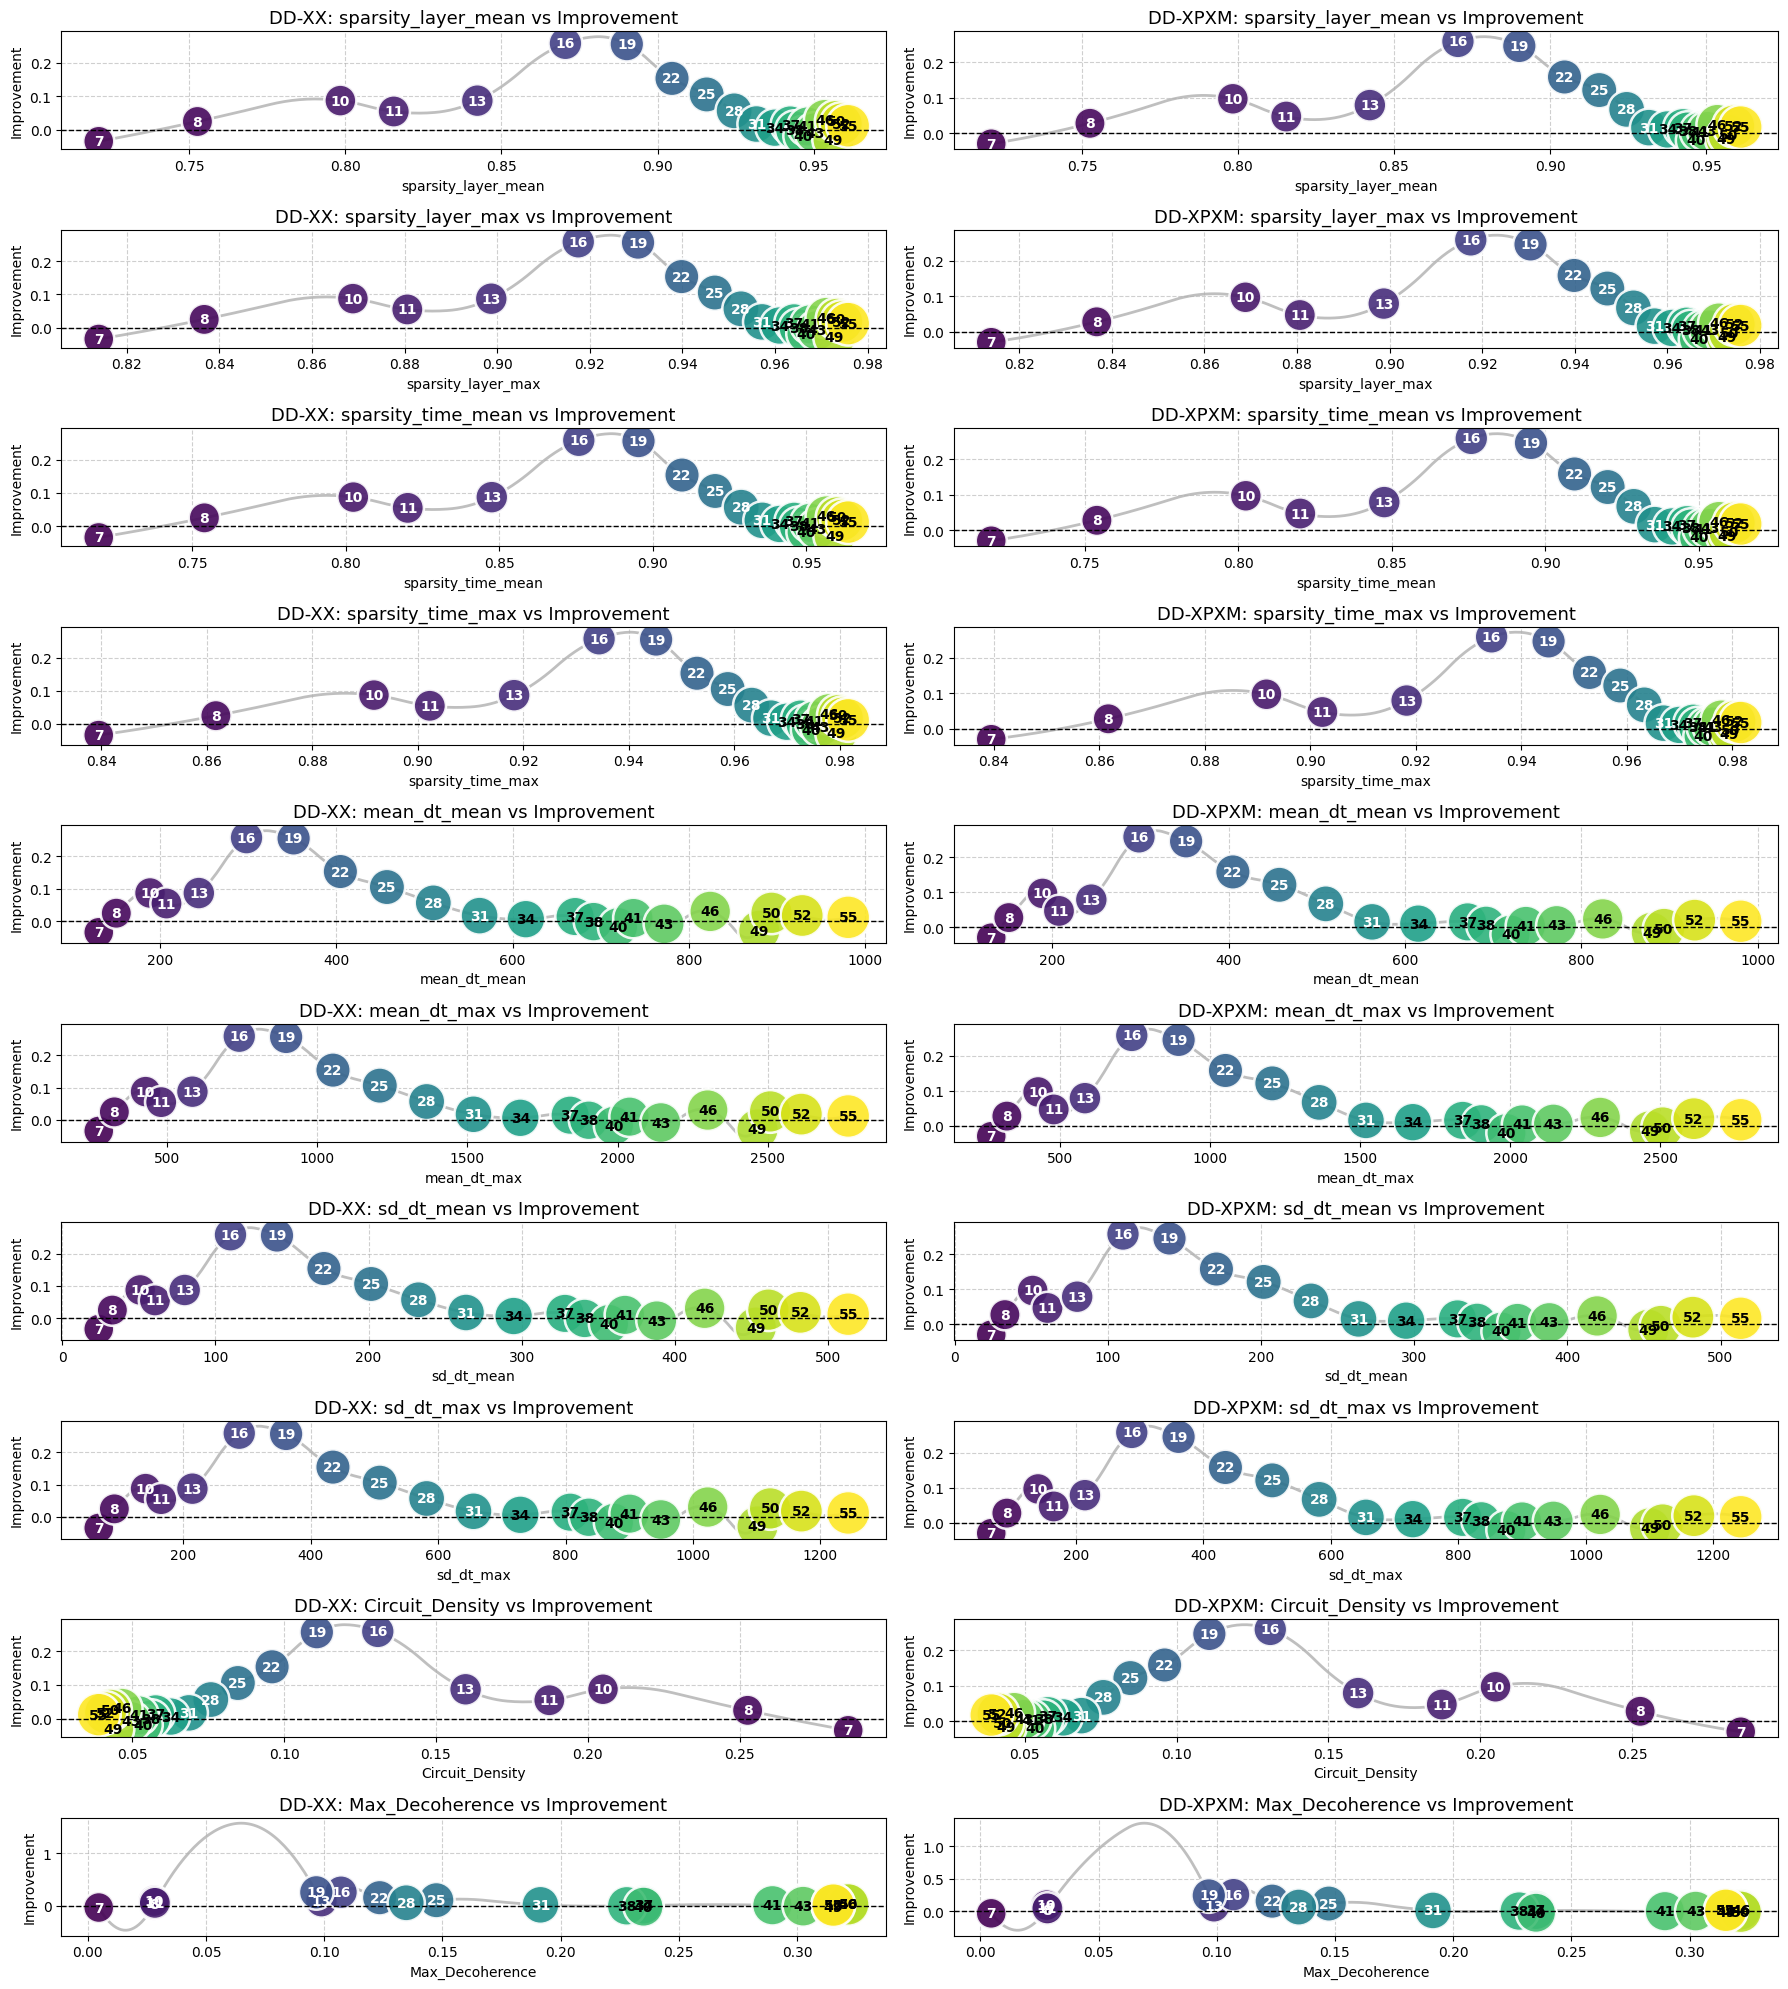

In [22]:
params = [
    "sparsity_layer_mean",
    "sparsity_layer_max",
    "sparsity_time_mean",
    "sparsity_time_max",
    "mean_dt_mean",
    "mean_dt_max",
    "sd_dt_mean",
    "sd_dt_max",
    "Circuit_Density",
    "Max_Decoherence"
]

improvements = {
    "Improvement_dd_xx": "DD-XX",
    "Improvement_dd_xpxm": "DD-XPXM",
}

fig, axes = plt.subplots(
    len(params),
    len(improvements),
    figsize=(18, 20),
    sharey=False,
)

for i, param in enumerate(params):
    for j, (imp_col, label) in enumerate(improvements.items()):
        plot_param_vs_improvement(
            axes[i, j],
            param,
            imp_col,
            f"{label}: {param} vs Improvement",
        )

plt.tight_layout()
plt.show()
